1. Name - Humera Bano
2. USC ID : 7255691039
3. Github username : humera811

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# __1. Multi-class and Multi-Label Classification Using Support Vector Machines__

## __(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.__

In [2]:
path = "../data/Frogs_MFCCs.csv"

In [3]:
anuran_df = pd.read_csv(path, sep=",", header=0) # na_values = '?'
anuran_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
# dropping recodID column
# anuran_df.drop(columns='RecordID',inplace= True)

In [5]:
anuran_df.shape

(7195, 26)

In [6]:
# using value_counts method to find unique values present in columns
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
anuran_df['Family'].value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [7]:
anuran_df['Species'].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [8]:
anuran_df['Genus'].value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [9]:
anuran_df.loc[:,["Family","Species","Genus"]]

,Family,Species,Genus
0,Leptodactylidae,AdenomeraAndre,Adenomera
1,Leptodactylidae,AdenomeraAndre,Adenomera
2,Leptodactylidae,AdenomeraAndre,Adenomera
3,Leptodactylidae,AdenomeraAndre,Adenomera
4,Leptodactylidae,AdenomeraAndre,Adenomera
...,...,...,...
7190,Hylidae,ScinaxRuber,Scinax
7191,Hylidae,ScinaxRuber,Scinax
7192,Hylidae,ScinaxRuber,Scinax
7193,Hylidae,ScinaxRuber,Scinax


In [10]:
# Encode the Family, Species, Genus columns values since they contain strings.
# factorizing the labels
# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
anuran_df['Family'] = pd.factorize(anuran_df['Family'])[0]
anuran_df['Genus'] = pd.factorize(anuran_df['Genus'])[0]
anuran_df['Species'] = pd.factorize(anuran_df['Species'])[0]

In [11]:
anuran_df.loc[:,["Family","Species","Genus"]]

,Family,Species,Genus
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
7190,2,9,7
7191,2,9,7
7192,2,9,7
7193,2,9,7


In [12]:
# selecting 70% of data randomly for training set
frogTrainData = anuran_df.sample(frac=0.7)

# rest 30% data as testing set
testIdx = list(set(anuran_df.index) - set(frogTrainData.index))
frogTestData = anuran_df.iloc[testIdx]

# resetting index
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
frogTrainData = frogTrainData.reset_index(drop=True)
frogTestData = frogTestData.reset_index(drop=True)

frogTrainData

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.000000,0.439628,0.377422,0.581440,0.153678,0.033047,-0.095888,-0.000966,0.285497,0.007301,...,0.203996,0.039064,-0.061961,-0.076765,0.051057,0.176680,0,0,2,19
1,1.000000,0.200096,0.185195,0.532696,0.224098,0.117945,-0.085963,0.042195,0.198091,-0.033822,...,0.171278,-0.106889,-0.157007,-0.068567,0.173008,0.183327,0,0,2,21
2,1.000000,0.177393,0.429386,0.364994,-0.074039,0.284126,0.265430,-0.091019,-0.039399,-0.026585,...,0.108318,-0.122817,-0.033353,0.165015,0.059967,-0.101402,0,4,6,47
3,1.000000,0.472478,0.400541,0.230607,0.066014,0.152239,0.034030,-0.038350,0.066882,0.066598,...,-0.016722,-0.020092,0.007876,-0.024567,0.018596,0.058054,2,3,5,40
4,1.000000,0.429504,0.187805,0.311943,0.082550,0.074162,0.188721,0.058465,-0.153685,0.001552,...,-0.219838,0.035556,0.052481,-0.043248,-0.113814,-0.083345,1,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,1.000000,0.092502,-0.189947,0.310286,0.421261,0.102333,-0.221291,-0.114561,0.089184,0.179056,...,-0.090678,-0.045722,-0.045561,-0.084053,-0.028260,0.054127,1,1,1,11
5032,0.671202,0.894315,1.000000,0.193003,-0.206845,0.285572,-0.006534,-0.019742,0.289372,0.099879,...,-0.069425,-0.222312,0.071322,0.038808,-0.023362,0.198593,2,3,5,40
5033,1.000000,0.414947,0.226881,0.383086,0.091461,0.044433,0.131375,0.013703,-0.109446,-0.008784,...,-0.087612,0.112568,0.016052,-0.056429,0.000724,0.022645,1,1,1,13
5034,1.000000,0.079061,-0.044073,0.374230,0.200714,0.133508,-0.060159,-0.060999,0.184007,0.104711,...,0.270289,0.073814,-0.135160,-0.195967,-0.006092,0.239452,0,0,2,21


In [13]:
frogTestData

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,0,0,0,1
1,1.0,0.148539,-0.096910,0.257523,0.260881,0.312603,0.134134,-0.216262,-0.189334,0.261960,...,-0.034082,-0.120716,-0.100800,-0.001992,0.111462,0.103637,0,0,0,1
2,1.0,0.263944,0.090358,0.368888,0.356645,0.252806,0.063921,-0.155007,-0.137743,0.200262,...,-0.074168,-0.083995,-0.104413,-0.071431,0.028842,0.019180,0,0,0,1
3,1.0,0.273218,-0.234703,-0.079620,0.159811,0.416406,0.368838,0.016878,-0.171288,-0.115424,...,-0.253103,-0.154244,-0.002606,0.092999,0.091724,0.003595,0,0,0,1
4,1.0,0.235682,0.029241,0.349117,0.355932,0.290697,0.081008,-0.193793,-0.151462,0.212130,...,-0.158932,-0.098565,-0.078413,-0.043410,0.033478,-0.006953,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,-0.616029,-0.302357,0.063417,0.095671,0.439930,0.069414,-0.145534,0.031354,0.069073,...,0.056971,0.037285,0.023818,0.042104,-0.035603,-0.097343,2,7,9,60
2155,1.0,-0.591520,-0.268901,0.050042,0.116960,0.444706,0.059268,-0.158389,0.066648,0.083924,...,0.074444,0.117996,0.045522,0.050734,-0.034757,-0.085131,2,7,9,60
2156,1.0,-0.507564,-0.249969,0.031781,-0.079888,0.484274,0.125143,-0.069555,0.114265,0.099647,...,0.011524,0.111998,0.015886,0.008636,-0.021933,-0.069692,2,7,9,60
2157,1.0,-0.558546,-0.238442,0.066527,0.123090,0.395953,0.066522,-0.152216,0.078294,0.094184,...,0.034202,0.040540,-0.003755,0.036059,-0.031853,-0.090206,2,7,9,60


## __(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:__

### __i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.__

- **Hamming Loss Metric**: Hamming Loss computes the proportion of incorrectly predicted labels to the total number of labels. Unlike exact match it rewards for partial correct labels.
- **Exact Match Metric**: The exact match ratio is ratio of all the predicted labels that match the true labels. Its value is 1 when the model is perfect, and 0 when the model is very bad. It increases only when the model correctly identifies every possible label that an example has, without any false positive.
- **Drawbacks of using EMR** is that is does not account for partially correct labels. So, using Hamming Loss metric resolves this problem.

In [14]:
def getHammingLoss(YTrue, Y_prediction):
    miss = 0
    for truth, prediction in zip(YTrue.values, Y_prediction.values):
        miss = miss + np.sum( truth != prediction )
    return miss / YTrue.shape[0] * YTrue.shape[1]

def exactMatch(YTrue, Y_prediction ):
    miss = 0
    for truth, prediction in zip( YTrue.values, Y_prediction.values ):
        if np.sum( truth != prediction ) != 0 :
            miss = miss + 1
    return 1 - (miss / YTrue.shape[0])

### __ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.__

In [15]:
# splitting train and test data
trainingX = frogTrainData.iloc[:, :-4]
testingX = frogTestData.iloc[:, :-4]

In [16]:
# Splitting train and test - labels
# family
train_family = frogTrainData.iloc[:, -4]
testFamily = frogTestData.iloc[:, -4]
# genus
train_genus = frogTrainData.iloc[:, -3]
testGenus = frogTestData.iloc[:, -3] 
# species
train_Species = frogTrainData.iloc[:, -2]
test_Species = frogTestData.iloc[:, -2]


### **Gaussian SVC without standardized Attributes**

In [67]:
# Classifiers of gaussian with each label as output
gaussian_classifier = {}
#cross-validation with 10 splits
kfold_cv = KFold(n_splits=10)
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
#params
clf_params = {
    'param_grid' : {'C' : np.logspace(1, 3, 3), 'gamma' : np.logspace(-4, 5, 10)}, 
    'cv': kfold_cv,
    'n_jobs': -1
}

In [68]:
# To display Best C, Gamma pair and Classification Report 
def display(cv_classifier, testData_eval, test_prediction):
    print('Best C and Gamma pair is', cv_classifier.best_params_['C'],'and',cv_classifier.best_params_['gamma'])
    print("The best score for the SVM is:",cv_classifier.best_score_)
    print('-'*50)
    print("Classification Report is:")
    # Classification Report
    print(classification_report(testData_eval, test_prediction))
    

In [69]:
# To calc and return the classifier with passed classifier ( SMOTE, LinearSVC, SVC )
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

def model(trainingX, train_Y, model_cls, param):
    if model_cls == 'SMOTE_SVC':
        est = Pipeline([('sampling', SMOTE()), ('classification', LinearSVC(penalty='l1', max_iter=10000, dual=False))])
    elif model_cls == 'Linear_SVC':
        est = LinearSVC(penalty ='l1', max_iter=7600, dual=False)
    elif model_cls == 'SVC':
        est = SVC()
    crossvalClassifier = GridSearchCV(estimator = est, **param)
    crossvalClassifier.fit(trainingX, train_Y)  
    return crossvalClassifier

#### __Family Label Classification__

In [70]:
model_cls = model(trainingX, train_family, 'SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'gamma', 'score', 'rank' ])
for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'],params['gamma'],score, rank])
    temp_data = pd.Series(temp, index = ['C', 'gamma', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
print("The grid scores:")
cls_result

The grid scores:


,C,gamma,score,rank
0,10.0,0.0001,0.627887,21.0
1,10.0,0.0010,0.859220,17.0
2,10.0,0.0100,0.936065,13.0
3,10.0,0.1000,0.969822,9.0
4,10.0,1.0000,0.990868,1.0
5,10.0,10.0000,0.986893,4.0
6,10.0,100.0000,0.801238,18.0
7,10.0,1000.0000,0.626300,22.0
8,10.0,10000.0000,0.614782,25.0
9,10.0,100000.0000,0.613391,28.0


In [71]:
#Test Data Evaluation
familyTestPrediction = model_cls.predict(testingX)

# Display best C, Gamma and Classification report
display(model_cls, testFamily, familyTestPrediction)

Best C and Gamma pair is 10.0 and 1.0
The best score for the SVM is:
 0.9908678879106315
--------------------------------------------------
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1331
           1       0.99      1.00      1.00       165
           2       0.99      0.99      0.99       646
           3       0.94      0.94      0.94        17

    accuracy                           0.99      2159
   macro avg       0.98      0.98      0.98      2159
weighted avg       0.99      0.99      0.99      2159



#### __Species Label Classification__

In [22]:
model_cls = model(trainingX, train_Species, 'SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'gamma', 'score', 'rank' ])
for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'],params['gamma'],score, rank])
    temp_data = pd.Series(temp, index = ['C', 'gamma', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
print("The grid scores:")
cls_result

The grid scores:


,C,gamma,score,rank
0,10.0,0.0001,0.503981,21.0
1,10.0,0.0010,0.845915,16.0
2,10.0,0.0100,0.940832,13.0
3,10.0,0.1000,0.973993,10.0
4,10.0,1.0000,0.988684,1.0
5,10.0,10.0000,0.976370,7.0
6,10.0,100.0000,0.693018,18.0
7,10.0,1000.0000,0.495047,22.0
8,10.0,10000.0000,0.485117,25.0
9,10.0,100000.0000,0.483726,28.0


In [23]:
#Test Data Evaluation
speciesTestPrediction = model_cls.predict(testingX)

# Display best C, Gamma and Classification report
display(model_cls, test_Species, speciesTestPrediction)

Best C and Gamma pair is 10.0 and 1.0
--------------------------------------------------
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       213
           1       0.99      1.00      1.00       165
           2       1.00      1.00      1.00      1042
           3       0.99      0.97      0.98        91
           4       0.97      0.99      0.98       139
           5       0.99      1.00      0.99       324
           6       0.97      1.00      0.99        76
           7       0.90      0.78      0.84        36
           8       1.00      0.94      0.97        17
           9       1.00      0.98      0.99        56

    accuracy                           0.99      2159
   macro avg       0.98      0.96      0.97      2159
weighted avg       0.99      0.99      0.99      2159



#### __Genus Label Classification__

In [24]:
model_cls = model(trainingX, train_genus, 'SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'gamma', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):    
    temp = []
    temp.extend([params['C'],params['gamma'],score, rank])
    temp_data = pd.Series(temp, index = ['C', 'gamma', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
print("The grid scores:")
cls_result

The grid scores:


,C,gamma,score,rank
0,10.0,0.0001,0.576654,24.0
1,10.0,0.0010,0.809772,16.0
2,10.0,0.0100,0.931894,13.0
3,10.0,0.1000,0.971807,10.0
4,10.0,1.0000,0.988087,1.0
5,10.0,10.0000,0.979745,6.0
6,10.0,100.0000,0.755367,18.0
7,10.0,1000.0000,0.586584,21.0
8,10.0,10000.0000,0.576258,25.0
9,10.0,100000.0000,0.574867,28.0


In [25]:
#Test Data Evaluation
testGenusPrediction = model_cls.predict(testingX)

# Display best C, Gamma and Classification report
display(model_cls, testGenus, testGenusPrediction)

Best C and Gamma pair is 10.0 and 1.0
--------------------------------------------------
Classification Report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       0.99      1.00      1.00       165
           2       0.99      0.97      0.98        91
           3       0.99      1.00      0.99       463
           4       0.97      1.00      0.99        76
           5       0.93      0.78      0.85        36
           6       1.00      0.94      0.97        17
           7       0.98      0.98      0.98        56

    accuracy                           0.99      2159
   macro avg       0.98      0.96      0.97      2159
weighted avg       0.99      0.99      0.99      2159



### __Gaussian SVC without standardized Attributes (One vs All)__

In [26]:
YTrue = frogTestData.iloc[:, -4:-1]
Y_prediction = pd.DataFrame({'Family': familyTestPrediction,  'Genus': testGenusPrediction, 'Species': speciesTestPrediction})

In [27]:
print('Exact Match : ', exactMatch(YTrue, Y_prediction))
print('Hamming Loss : ', getHammingLoss(YTrue, Y_prediction))

Exact Match :  0.9865678554886521
Hamming Loss :  0.07642427049559981


### __Gaussian SVC with standardized Attributes__

In [28]:
# standardize data
standardizeScaler = StandardScaler()
standardizeTest_X = standardizeScaler.fit_transform(testingX)
standardTrain_X = standardizeScaler.fit_transform(trainingX)

#### __Family Label Classification__

In [29]:
model_cls = model(standardTrain_X, train_family, 'SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'gamma', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'],params['gamma'],score, rank])
    temp_data = pd.Series(temp, index = ['C', 'gamma', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
print("The grid scores :")
cls_result

The grid scores :


,C,gamma,score,rank
0,10.0,0.0001,0.935073,12.0
1,10.0,0.0010,0.950360,10.0
2,10.0,0.0100,0.986498,6.0
3,10.0,0.1000,0.989673,1.0
4,10.0,1.0000,0.911240,13.0
5,10.0,10.0000,0.666807,16.0
6,10.0,100.0000,0.615576,19.0
7,10.0,1000.0000,0.613391,22.0
8,10.0,10000.0000,0.613391,22.0
9,10.0,100000.0000,0.613391,22.0


In [30]:
# Test Data Evaluation
familyTestPrediction = model_cls.predict(standardizeTest_X)

# Display best C, Gamma and Classification report
display(model_cls, testFamily, familyTestPrediction)

Best C and Gamma pair is 10.0 and 0.1
--------------------------------------------------
Classification Report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1331
           1       1.00      1.00      1.00       165
           2       0.99      0.99      0.99       646
           3       1.00      0.94      0.97        17

    accuracy                           0.99      2159
   macro avg       1.00      0.98      0.99      2159
weighted avg       0.99      0.99      0.99      2159



#### __Species Label Classification__

In [31]:
model_cls = model(standardTrain_X, train_Species, 'SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'gamma', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):    
    temp = []
    temp.extend([params['C'],params['gamma'],score, rank])
    temp_data = pd.Series(temp, index = ['C', 'gamma', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
print("The grid scores :")
cls_result

The grid scores :


,C,gamma,score,rank
0,10.0,0.0001,0.922165,12.0
1,10.0,0.0010,0.967044,10.0
2,10.0,0.0100,0.985903,1.0
3,10.0,0.1000,0.984512,4.0
4,10.0,1.0000,0.842334,13.0
5,10.0,10.0000,0.527213,16.0
6,10.0,100.0000,0.485911,19.0
7,10.0,1000.0000,0.483726,22.0
8,10.0,10000.0000,0.483726,22.0
9,10.0,100000.0000,0.483726,22.0


In [32]:
# Test Data Evaluation
test_pred_Species = model_cls.predict(standardizeTest_X)

# Display best C, Gamma and Classification report
display(model_cls, test_Species, speciesTestPrediction)

Best C and Gamma pair is 10.0 and 0.01
--------------------------------------------------
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       213
           1       0.99      1.00      1.00       165
           2       1.00      1.00      1.00      1042
           3       0.99      0.97      0.98        91
           4       0.97      0.99      0.98       139
           5       0.99      1.00      0.99       324
           6       0.97      1.00      0.99        76
           7       0.90      0.78      0.84        36
           8       1.00      0.94      0.97        17
           9       1.00      0.98      0.99        56

    accuracy                           0.99      2159
   macro avg       0.98      0.96      0.97      2159
weighted avg       0.99      0.99      0.99      2159



#### __Genus Label Classification__

In [33]:
model_cls = model(standardTrain_X, train_genus, 'SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'gamma', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'],params['gamma'],score, rank])
    temp_data = pd.Series(temp, index = ['C', 'gamma', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
print("The grid scores :")
cls_result

The grid scores :


,C,gamma,score,rank
0,10.0,0.0001,0.911441,12.0
1,10.0,0.0010,0.954529,10.0
2,10.0,0.0100,0.988287,1.0
3,10.0,0.1000,0.987888,2.0
4,10.0,1.0000,0.860603,13.0
5,10.0,10.0000,0.622325,16.0
6,10.0,100.0000,0.577052,19.0
7,10.0,1000.0000,0.574867,22.0
8,10.0,10000.0000,0.574867,22.0
9,10.0,100000.0000,0.574867,22.0


In [34]:
# Test Data Evaluation
testGenusPrediction = model_cls.predict(standardizeTest_X)

# Display best C, Gamma and Classification report
display(model_cls, testGenus, testGenusPrediction)

Best C and Gamma pair is 10.0 and 0.01
--------------------------------------------------
Classification Report is:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1255
           1       0.99      1.00      1.00       165
           2       0.99      0.92      0.95        91
           3       0.98      0.99      0.99       463
           4       0.97      1.00      0.99        76
           5       0.97      0.78      0.86        36
           6       1.00      0.88      0.94        17
           7       1.00      0.98      0.99        56

    accuracy                           0.99      2159
   macro avg       0.99      0.94      0.96      2159
weighted avg       0.99      0.99      0.99      2159



### __Gaussian SVC with standardized Attributes (One vs All)__

In [35]:
YTrue = frogTestData.iloc[:, -4:-1]
Y_prediction = pd.DataFrame({'Family': familyTestPrediction, 'Genus': testGenusPrediction, 'Species': speciesTestPrediction})

In [36]:
print('The Exact Match of whole dataset for SVM with one vs all Gaussian is: ', exactMatch(YTrue, Y_prediction))
print('The Hamming Loss of the whole dataset for SVM with one vs all Gaussian kernel is : ', getHammingLoss(YTrue, Y_prediction) )

The Exact Match of whole dataset for SVM with one vs all Gaussian is:  0.984251968503937
The Hamming Loss of the whole dataset for SVM with one vs all Gaussian kernel is :  0.07920333487725799


**Summary**

- SVM with Gaussian kernels and one versus all classifier **performed well** as the exact match is high and hamming loss of the classifier is low, although the labels are imbalanced.

### __iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.__

In [37]:
#params
clf_params = {
    'param_grid' : {'C' : np.logspace(-4, 5, 10)}, 
    'cv' : kfold_cv,
    'n_jobs': -1
}

In [38]:
#Display Best C and Classification Report 

def display(cv_classifier, testData_eval, test_prediction):
    print('Best C is', cv_classifier.best_params_['C'])
    # print('Best C is',cv_classifier.best_params_['score'])
    print('-'*50)
    print("Classification Report")
    print(classification_report(testData_eval, test_prediction))

#### __Family Label Classification__

In [39]:
model_cls = model(standardTrain_X, train_family, 'Linear_SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'], score, rank])
    temp_data = pd.Series(temp, index = ['C', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
cls_result

,C,score,rank
0,0.0001,0.613391,10.0
1,0.0010,0.848695,9.0
2,0.0100,0.923157,8.0
3,0.1000,0.932291,7.0
4,1.0000,0.933879,6.0
5,10.0000,0.934475,1.0
6,100.0000,0.934475,1.0
7,1000.0000,0.934475,1.0
8,10000.0000,0.934475,1.0
9,100000.0000,0.934475,1.0


In [40]:
# Test Data Evaluation
test_pred_Family = model_cls.predict(standardizeTest_X)

# Display best C and Classification report
display(model_cls, testFamily, familyTestPrediction)

Best C is 10.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1331
           1       1.00      1.00      1.00       165
           2       0.99      0.99      0.99       646
           3       1.00      0.94      0.97        17

    accuracy                           0.99      2159
   macro avg       1.00      0.98      0.99      2159
weighted avg       0.99      0.99      0.99      2159



#### __Species Label Classification__

In [41]:
model_cls = model(standardTrain_X, train_Species, 'Linear_SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'], score, rank])
    temp_data = pd.Series(temp, index = ['C', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
cls_result

,C,score,rank
0,0.0001,0.091141,10.0
1,0.0010,0.781379,9.0
2,0.0100,0.913229,8.0
3,0.1000,0.949568,7.0
4,1.0000,0.957707,4.0
5,10.0000,0.957309,5.0
6,100.0000,0.957309,5.0
7,1000.0000,0.957707,1.0
8,10000.0000,0.957707,1.0
9,100000.0000,0.957707,1.0


In [42]:
# Test Data Evaluation
speciesTestPrediction = model_cls.predict(standardizeTest_X)

# Display best C and Classification report
display(model_cls, test_Species, speciesTestPrediction)

Best C is 1000.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       213
           1       0.91      0.96      0.93       165
           2       0.99      1.00      0.99      1042
           3       0.95      0.67      0.79        91
           4       0.93      0.96      0.94       139
           5       0.92      0.97      0.94       324
           6       0.96      0.93      0.95        76
           7       1.00      0.56      0.71        36
           8       0.79      0.88      0.83        17
           9       0.95      0.96      0.96        56

    accuracy                           0.96      2159
   macro avg       0.93      0.88      0.90      2159
weighted avg       0.96      0.96      0.96      2159



#### __Genus Label Classification__

In [43]:
model_cls = model(standardTrain_X, train_genus, 'Linear_SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'score', 'rank' ])
for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['C'], score, rank])
    temp_data = pd.Series(temp, index = ['C', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
cls_result

,C,score,rank
0,0.0001,0.574867,10.0
1,0.0010,0.819902,9.0
2,0.0100,0.911837,8.0
3,0.1000,0.937848,7.0
4,1.0000,0.949170,1.0
5,10.0000,0.948971,2.0
6,100.0000,0.948772,6.0
7,1000.0000,0.948971,2.0
8,10000.0000,0.948971,2.0
9,100000.0000,0.948971,2.0


In [44]:
# Test Data Evaluation
testGenusPrediction = model_cls.predict(standardizeTest_X)

# Display best C and Classification report
display(model_cls, testGenus, testGenusPrediction)

Best C is 1.0
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1255
           1       0.92      0.95      0.93       165
           2       0.91      0.66      0.76        91
           3       0.91      0.97      0.94       463
           4       0.97      0.88      0.92        76
           5       1.00      0.36      0.53        36
           6       0.91      0.59      0.71        17
           7       0.95      0.96      0.96        56

    accuracy                           0.95      2159
   macro avg       0.94      0.80      0.84      2159
weighted avg       0.95      0.95      0.94      2159



#### __L1-penalised SVC with standardized Attributes (One vs All)__

In [45]:
YTrue = frogTestData.iloc[:, -4:-1]
Y_prediction = pd.DataFrame({'Family': familyTestPrediction, 'Genus': testGenusPrediction, 'Species': speciesTestPrediction})

In [46]:
# print('Multilabel evaluation of SVM with L1 penalty')
print('The exact match score of whole dataset for L1 penalized SVM  is:: ', exactMatch(YTrue, Y_prediction))
print('The hamminng loss of the whole dataset for L1 penalized SVM  is: ', getHammingLoss(YTrue, Y_prediction))

The exact match score of whole dataset for L1 penalized SVM  is::  0.9411764705882353
The hamminng loss of the whole dataset for L1 penalized SVM  is:  0.3001389532190829


**Summary**

- SVM with L1 penalized data has problem with classification of minority class. Thus we can see low exact match and higher hamming score as compared to SVM with Gaussian kernels and one versus all classifier.

### __iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.__

In [47]:
#params
clf_params = {
    'param_grid' :  {'classification__C' : np.logspace(-2, 5, 10)},
    'cv' : kfold_cv,
    'n_jobs': -1
}

In [48]:
# To display Best C and Classification Report 

def display(cv_classifier, testData_eval, test_prediction):
    print('Best C is', cv_classifier.best_params_['classification__C'])
    print('-'*50)
    print("Classification Report")
    # Classification Report
    print(classification_report(testData_eval, test_prediction))

#### __Family Label Classification__

In [49]:
model_cls = model(standardTrain_X, train_family, 'SMOTE_SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'score', 'rank' ])
for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):   
    temp = []
    temp.extend([params['classification__C'], score, rank])
    temp_data = pd.Series(temp, index = ['C', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
cls_result

,C,score,rank
0,0.010000,0.896346,10.0
1,0.059948,0.912434,9.0
2,0.359381,0.916007,8.0
3,2.154435,0.919185,2.0
4,12.915497,0.917596,6.0
5,77.426368,0.918390,4.0
6,464.158883,0.919581,1.0
7,2782.559402,0.918392,3.0
8,16681.005372,0.917992,5.0
9,100000.000000,0.917398,7.0


In [50]:
# Test Data Evaluation
familyTestPrediction = model_cls.predict(standardizeTest_X)

# To display Best C and Classification Report 
display(model_cls, testFamily, familyTestPrediction)

Best C is 464.1588833612782
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1331
           1       0.77      0.97      0.86       165
           2       0.92      0.87      0.90       646
           3       0.27      0.94      0.42        17

    accuracy                           0.92      2159
   macro avg       0.73      0.93      0.78      2159
weighted avg       0.94      0.92      0.93      2159



#### __Species Label Classification__

In [51]:
# increased the maxiter still getting the warning
model_cls = model(standardTrain_X, train_Species, 'SMOTE_SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'score', 'rank' ])
for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['classification__C'], score, rank])
    temp_data = pd.Series(temp, index = ['C', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
cls_result

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the numb

,C,score,rank
0,0.010000,0.949763,10.0
1,0.059948,0.952941,9.0
2,0.359381,0.954132,4.0
3,2.154435,0.955125,1.0
4,12.915497,0.954532,2.0
5,77.426368,0.953141,7.0
6,464.158883,0.952943,8.0
7,2782.559402,0.953934,5.0
8,16681.005372,0.953538,6.0
9,100000.000000,0.954332,3.0


In [52]:
# Test Data Evaluation
speciesTestPrediction = model_cls.predict(standardizeTest_X)

# To display Best C and Classification Report 
display(model_cls, test_Species, speciesTestPrediction)

Best C is 2.1544346900318843
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       213
           1       0.94      0.95      0.95       165
           2       1.00      0.99      0.99      1042
           3       0.81      0.87      0.84        91
           4       0.94      0.95      0.94       139
           5       0.96      0.94      0.95       324
           6       0.94      0.95      0.94        76
           7       0.83      0.83      0.83        36
           8       0.47      0.94      0.63        17
           9       0.92      0.96      0.94        56

    accuracy                           0.96      2159
   macro avg       0.87      0.93      0.89      2159
weighted avg       0.96      0.96      0.96      2159



#### __Genus Label Classification__

In [53]:
model_cls = model(standardTrain_X, train_genus, 'SMOTE_SVC', clf_params)
cls_result = pd.DataFrame(columns = ['C', 'score', 'rank' ])

for params, rank, score in zip(model_cls.cv_results_['params'], model_cls.cv_results_['rank_test_score'], model_cls.cv_results_['mean_test_score']):
    temp = []
    temp.extend([params['classification__C'], score, rank])
    temp_data = pd.Series(temp, index = ['C', 'score', 'rank'])
    cls_result = cls_result.append(temp_data, ignore_index=True)
cls_result

,C,score,rank
0,0.010000,0.903300,10.0
1,0.059948,0.909655,9.0
2,0.359381,0.913033,8.0
3,2.154435,0.913429,6.0
4,12.915497,0.914421,2.0
5,77.426368,0.913428,7.0
6,464.158883,0.913826,5.0
7,2782.559402,0.914620,1.0
8,16681.005372,0.914025,3.0
9,100000.000000,0.913827,4.0


In [54]:
# Test Data Evaluation
testGenusPrediction = model_cls.predict(standardizeTest_X)

# To display Best C and Classification Report 
display(model_cls, testGenus, testGenusPrediction)

Best C is 2782.559402207126
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1255
           1       0.87      0.97      0.92       165
           2       0.59      0.87      0.70        91
           3       0.96      0.94      0.95       463
           4       0.91      0.93      0.92        76
           5       0.56      0.83      0.67        36
           6       0.36      0.94      0.52        17
           7       0.90      0.95      0.92        56

    accuracy                           0.92      2159
   macro avg       0.77      0.92      0.82      2159
weighted avg       0.94      0.92      0.92      2159



#### __SMOTE SVC with standardized Attributes (One vs All)__

In [55]:
YTrue = frogTestData.iloc[:, -4:-1]
Y_prediction = pd.DataFrame({'Family': familyTestPrediction, 'Genus': testGenusPrediction, 'Species': speciesTestPrediction})

print('Exact Match : ', exactMatch(YTrue, Y_prediction))
print('Hamming Loss : ', getHammingLoss(YTrue, Y_prediction) )

Exact Match :  0.8679944418712366
Hamming Loss :  0.6211208893006022


**SUMMARY**

- Among all the above classifier, SVM with Gaussian kernel with one vs all classifier performed best with high exact match and low hamming loss.

## __2. K-Means Clustering on a Multi-Class and Multi-Label Data Set__

### __Monte-Carlo Simulation:__
**Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.**

In [56]:
anuran_calls_data_X = anuran_df.iloc[:,:-4]
anuran_calls_data_Y = anuran_df.iloc[:,-4:-1]

### __(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.__

In [57]:
# k is choosen till 51 to find k between 1 and 50
#since k = 1 is null hence k starts from 2

def getOptimalK(data_X):
    bestK = 2
    bestScore = 0
    for i in range(2, 51):
        cluster_model = KMeans(n_clusters = i, random_state = 4)
        labels = cluster_model.fit_predict(data_X)
        average = silhouette_score(data_X, labels)
        # Find the max score
        if average > bestScore:
            bestK = i
            bestScore = average
    return bestK  

### __(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.__

In [58]:
def majoritylabel(data_Y, K, labels):
    major_cluster = pd.DataFrame(columns = data_Y.columns)
    for cluster in range(K):
        indexe, = np.where(labels == cluster)
        samples = data_Y.iloc[indexe, :]
        temp_arr = []
        for label in data_Y.columns:
            major_label = samples.loc[:, label].value_counts().index[0]
            temp_arr.append(major_label)
        major_cluster.loc[cluster] = temp_arr        
    return major_cluster.astype('int64') 

### __(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.__

In [59]:
def hamming_calculate(major_label,labels,data_Y):
    wrong_labels = 0
    for clus in range(len(major_label)):
        indexe, = np.where(labels == clus)
        for label in data_Y.loc[indexe].values:
            missed = (label != major_label.loc[clus].values)
            wrong_labels += np.sum(missed)
    distance = wrong_labels / data_Y.shape[0]
    loss = wrong_labels / (data_Y.shape[0] * data_Y.shape[1])
    return distance,loss

In [60]:
def monteCarloSimulation(count, data_X, data_Y):
    hamming_distance_arr = []
    hamming_loss_arr = []
    for i in range(1, count+1):
        print('=' * 40)
        print('Monte Carlo Simulation =>',i)
        # Find Optimal K
        optimal_k_value = getOptimalK(data_X)
        print('Optimal K is', optimal_k_value)
        # K-Means cluster on Optimal K value
        cluster_model = KMeans(n_clusters=optimal_k_value, random_state=4)
        labels = cluster_model.fit_predict(data_X)
        # Find Majority labels
        major_label = majoritylabel(data_Y, optimal_k_value, labels)
        print('Major Labels in each cluster')
        print(major_label)
        # Calculating Hamming Distance, Hamming Score, Hamming Loss
        hamming_dis , hamming_los = hamming_calculate(major_label,labels,data_Y)
        print('Hamming Distance : ', hamming_dis)
        print('Hamming Loss : ', hamming_los)
        print("Hamming score : ",(1 - np.mean(hamming_los)))
        hamming_distance_arr.append(hamming_dis)
        hamming_loss_arr.append(hamming_los)
    return hamming_distance_arr, hamming_loss_arr
        

In [61]:
#Monte Carlo simulation 
hamming_distance, hamming_loss = monteCarloSimulation(50, anuran_calls_data_X, anuran_calls_data_Y)

Monte Carlo Simulation => 1
Optimal K is 4
Major Labels in each cluster
   Family  Genus  Species
0       0      0        2
1       2      3        5
2       2      3        4
3       1      1        1
Hamming Distance :  0.66726893676164
Hamming Loss :  0.2224229789205467
Hamming score :  0.7775770210794533
Monte Carlo Simulation => 2
Optimal K is 4
Major Labels in each cluster
   Family  Genus  Species
0       0      0        2
1       2      3        5
2       2      3        4
3       1      1        1
Hamming Distance :  0.66726893676164
Hamming Loss :  0.2224229789205467
Hamming score :  0.7775770210794533
Monte Carlo Simulation => 3
Optimal K is 4
Major Labels in each cluster
   Family  Genus  Species
0       0      0        2
1       2      3        5
2       2      3        4
3       1      1        1
Hamming Distance :  0.66726893676164
Hamming Loss :  0.2224229789205467
Hamming score :  0.7775770210794533
Monte Carlo Simulation => 4
Optimal K is 4
Major Labels in each cluste

In [62]:
hamming_distance_value = np.array(hamming_distance)
hamming_loss_value = np.array(hamming_loss)

In [63]:
#Averages
print("Average Hamming Distance : ",np.mean(hamming_distance_value))
print("Average Hamming Score : ", 1 - np.mean(hamming_loss_value))
print("Average Hamming Loss: ",np.mean(hamming_loss_value))

Average Hamming Distance :  0.6672689367616398
Average Hamming Score :  0.7775770210794533
Average Hamming Loss:  0.2224229789205467


In [72]:
#Standard Deviations
print("Standard Deviation of Hamming Distances : ",np.std(hamming_distance_value))
print("Standard deviation of Hamming Loss is : ",np.std(hamming_loss_value))
print("Standard deviation of Hamming Score is : ", 1 - np.std(hamming_loss_value))

Standard Deviation of Hamming Distances :  2.220446049250313e-16
Standard deviation of Hamming Loss is :  0.0
Standard deviation of Hamming Score is :  1.0


## __3. ISLR 12.6.2__


### __(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram__

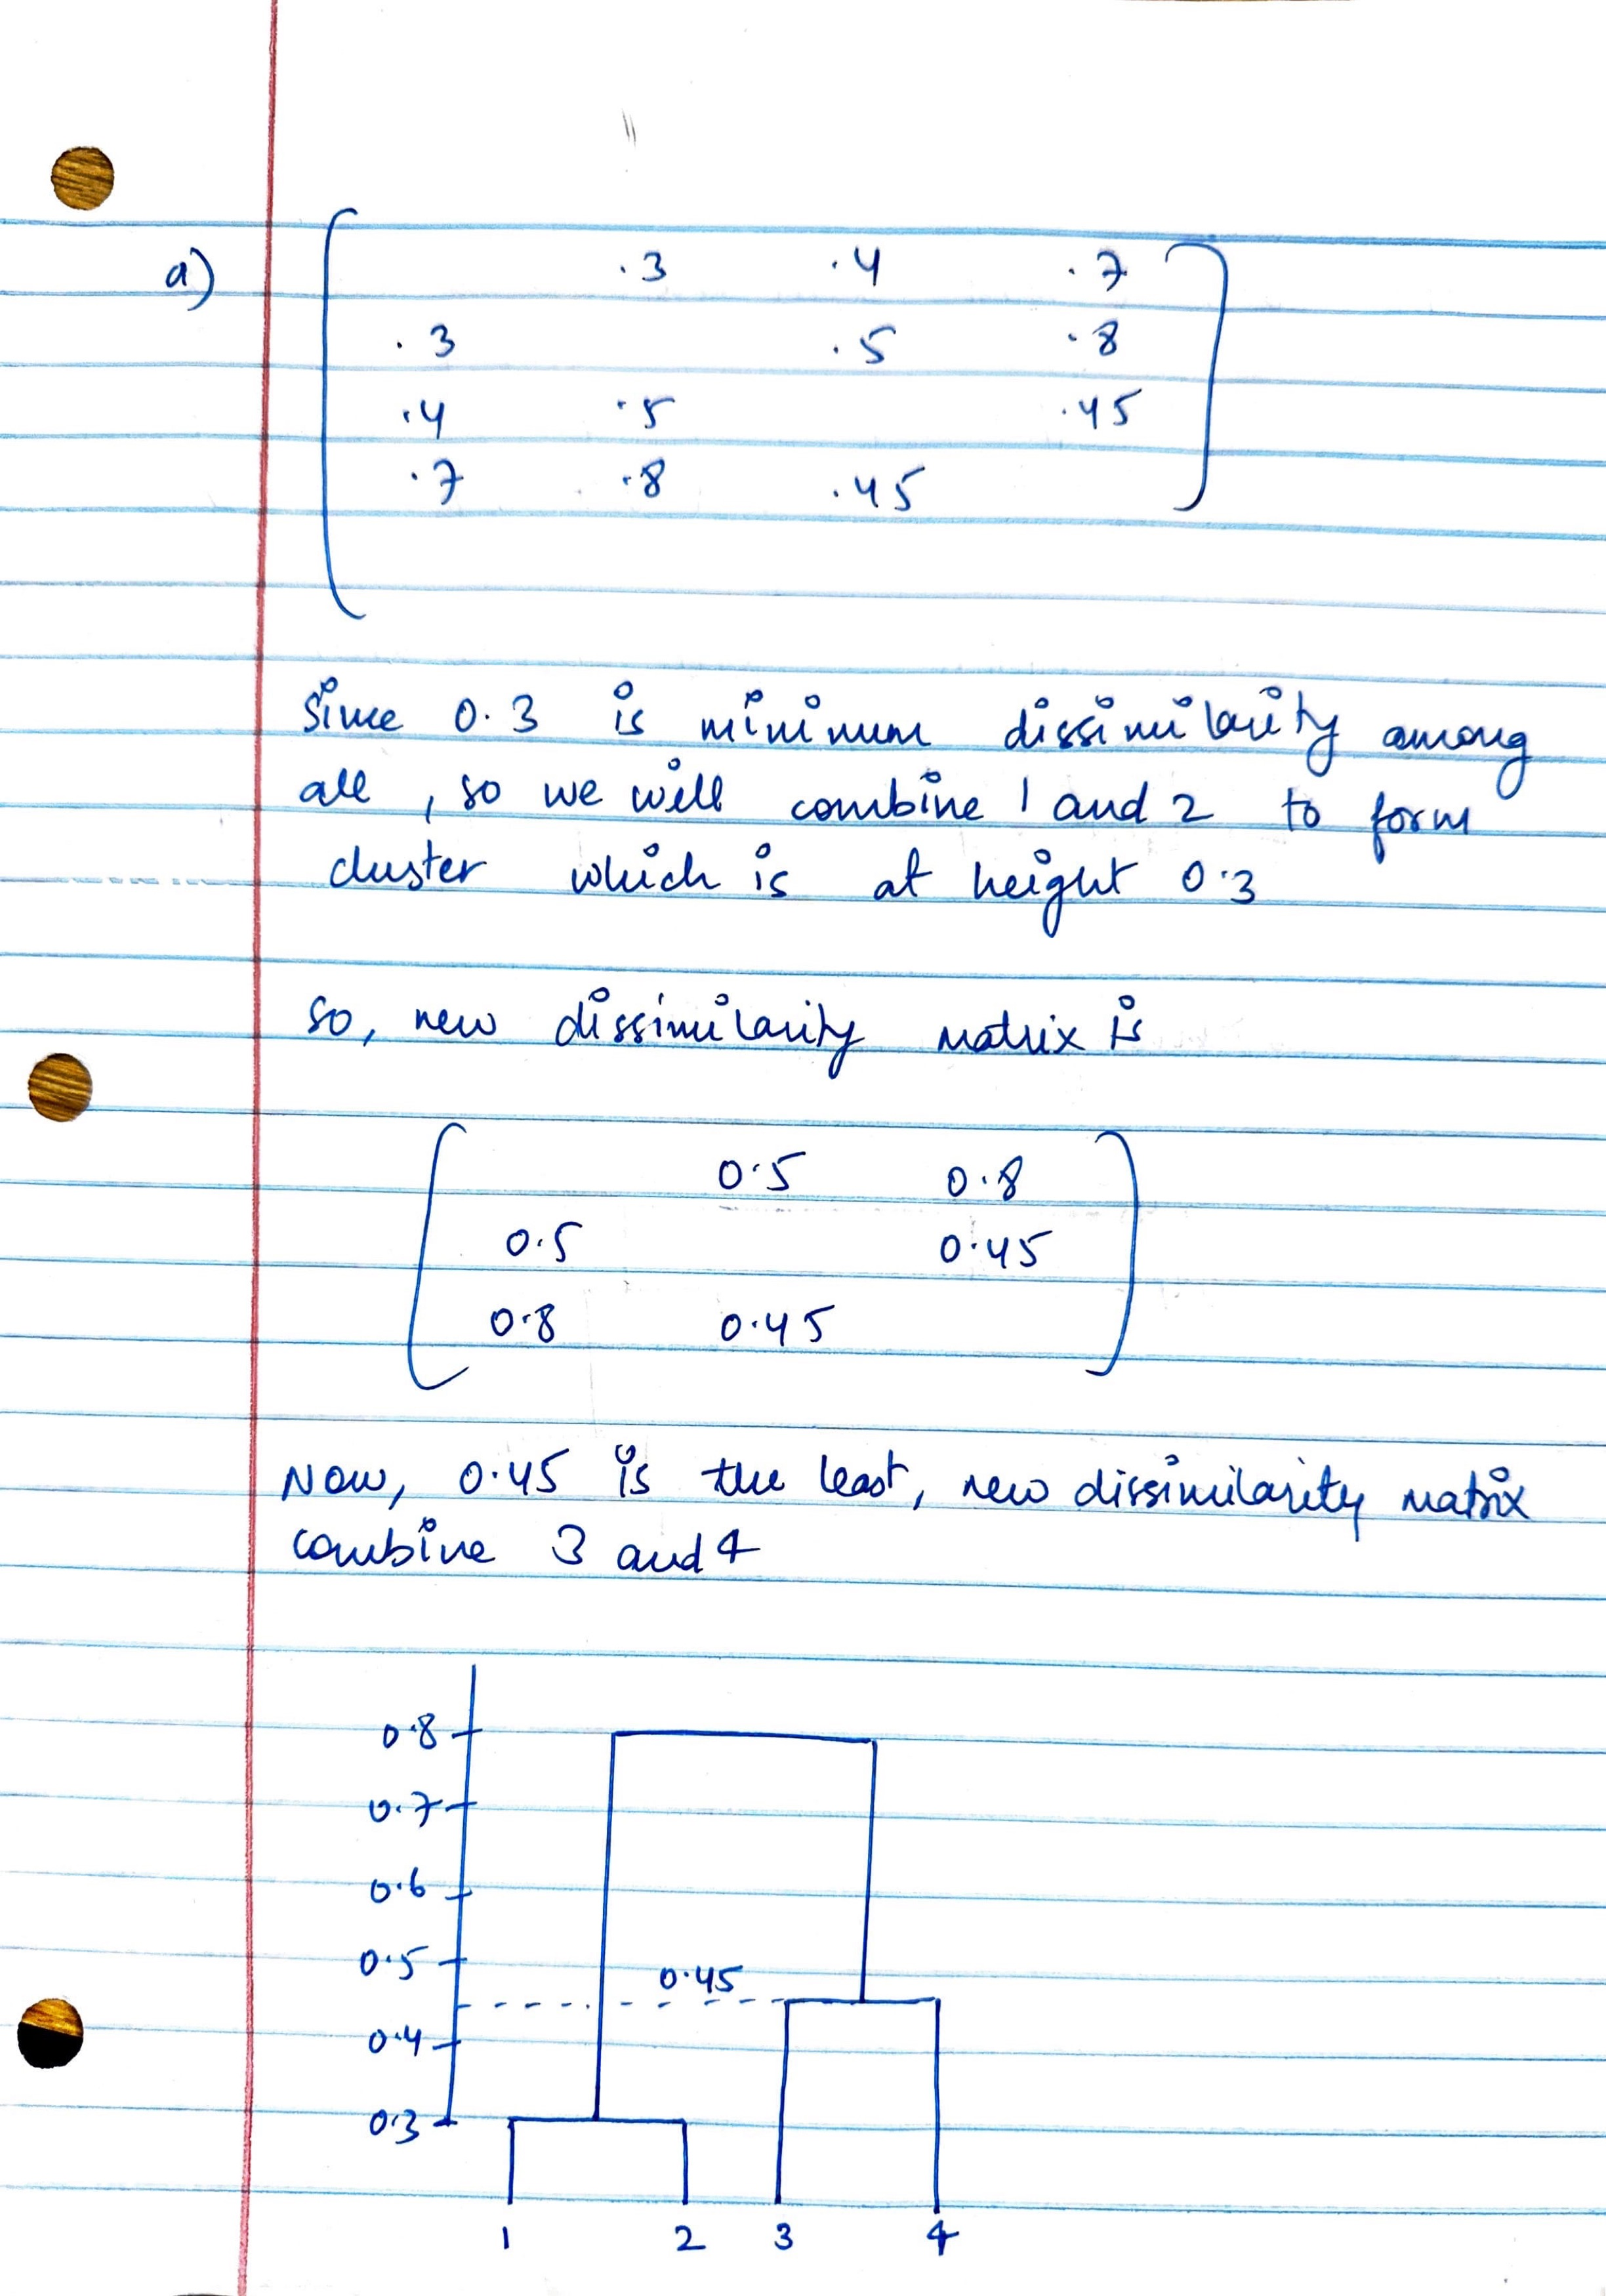

### __(b) Repeat (a), this time using single linkage clustering.__

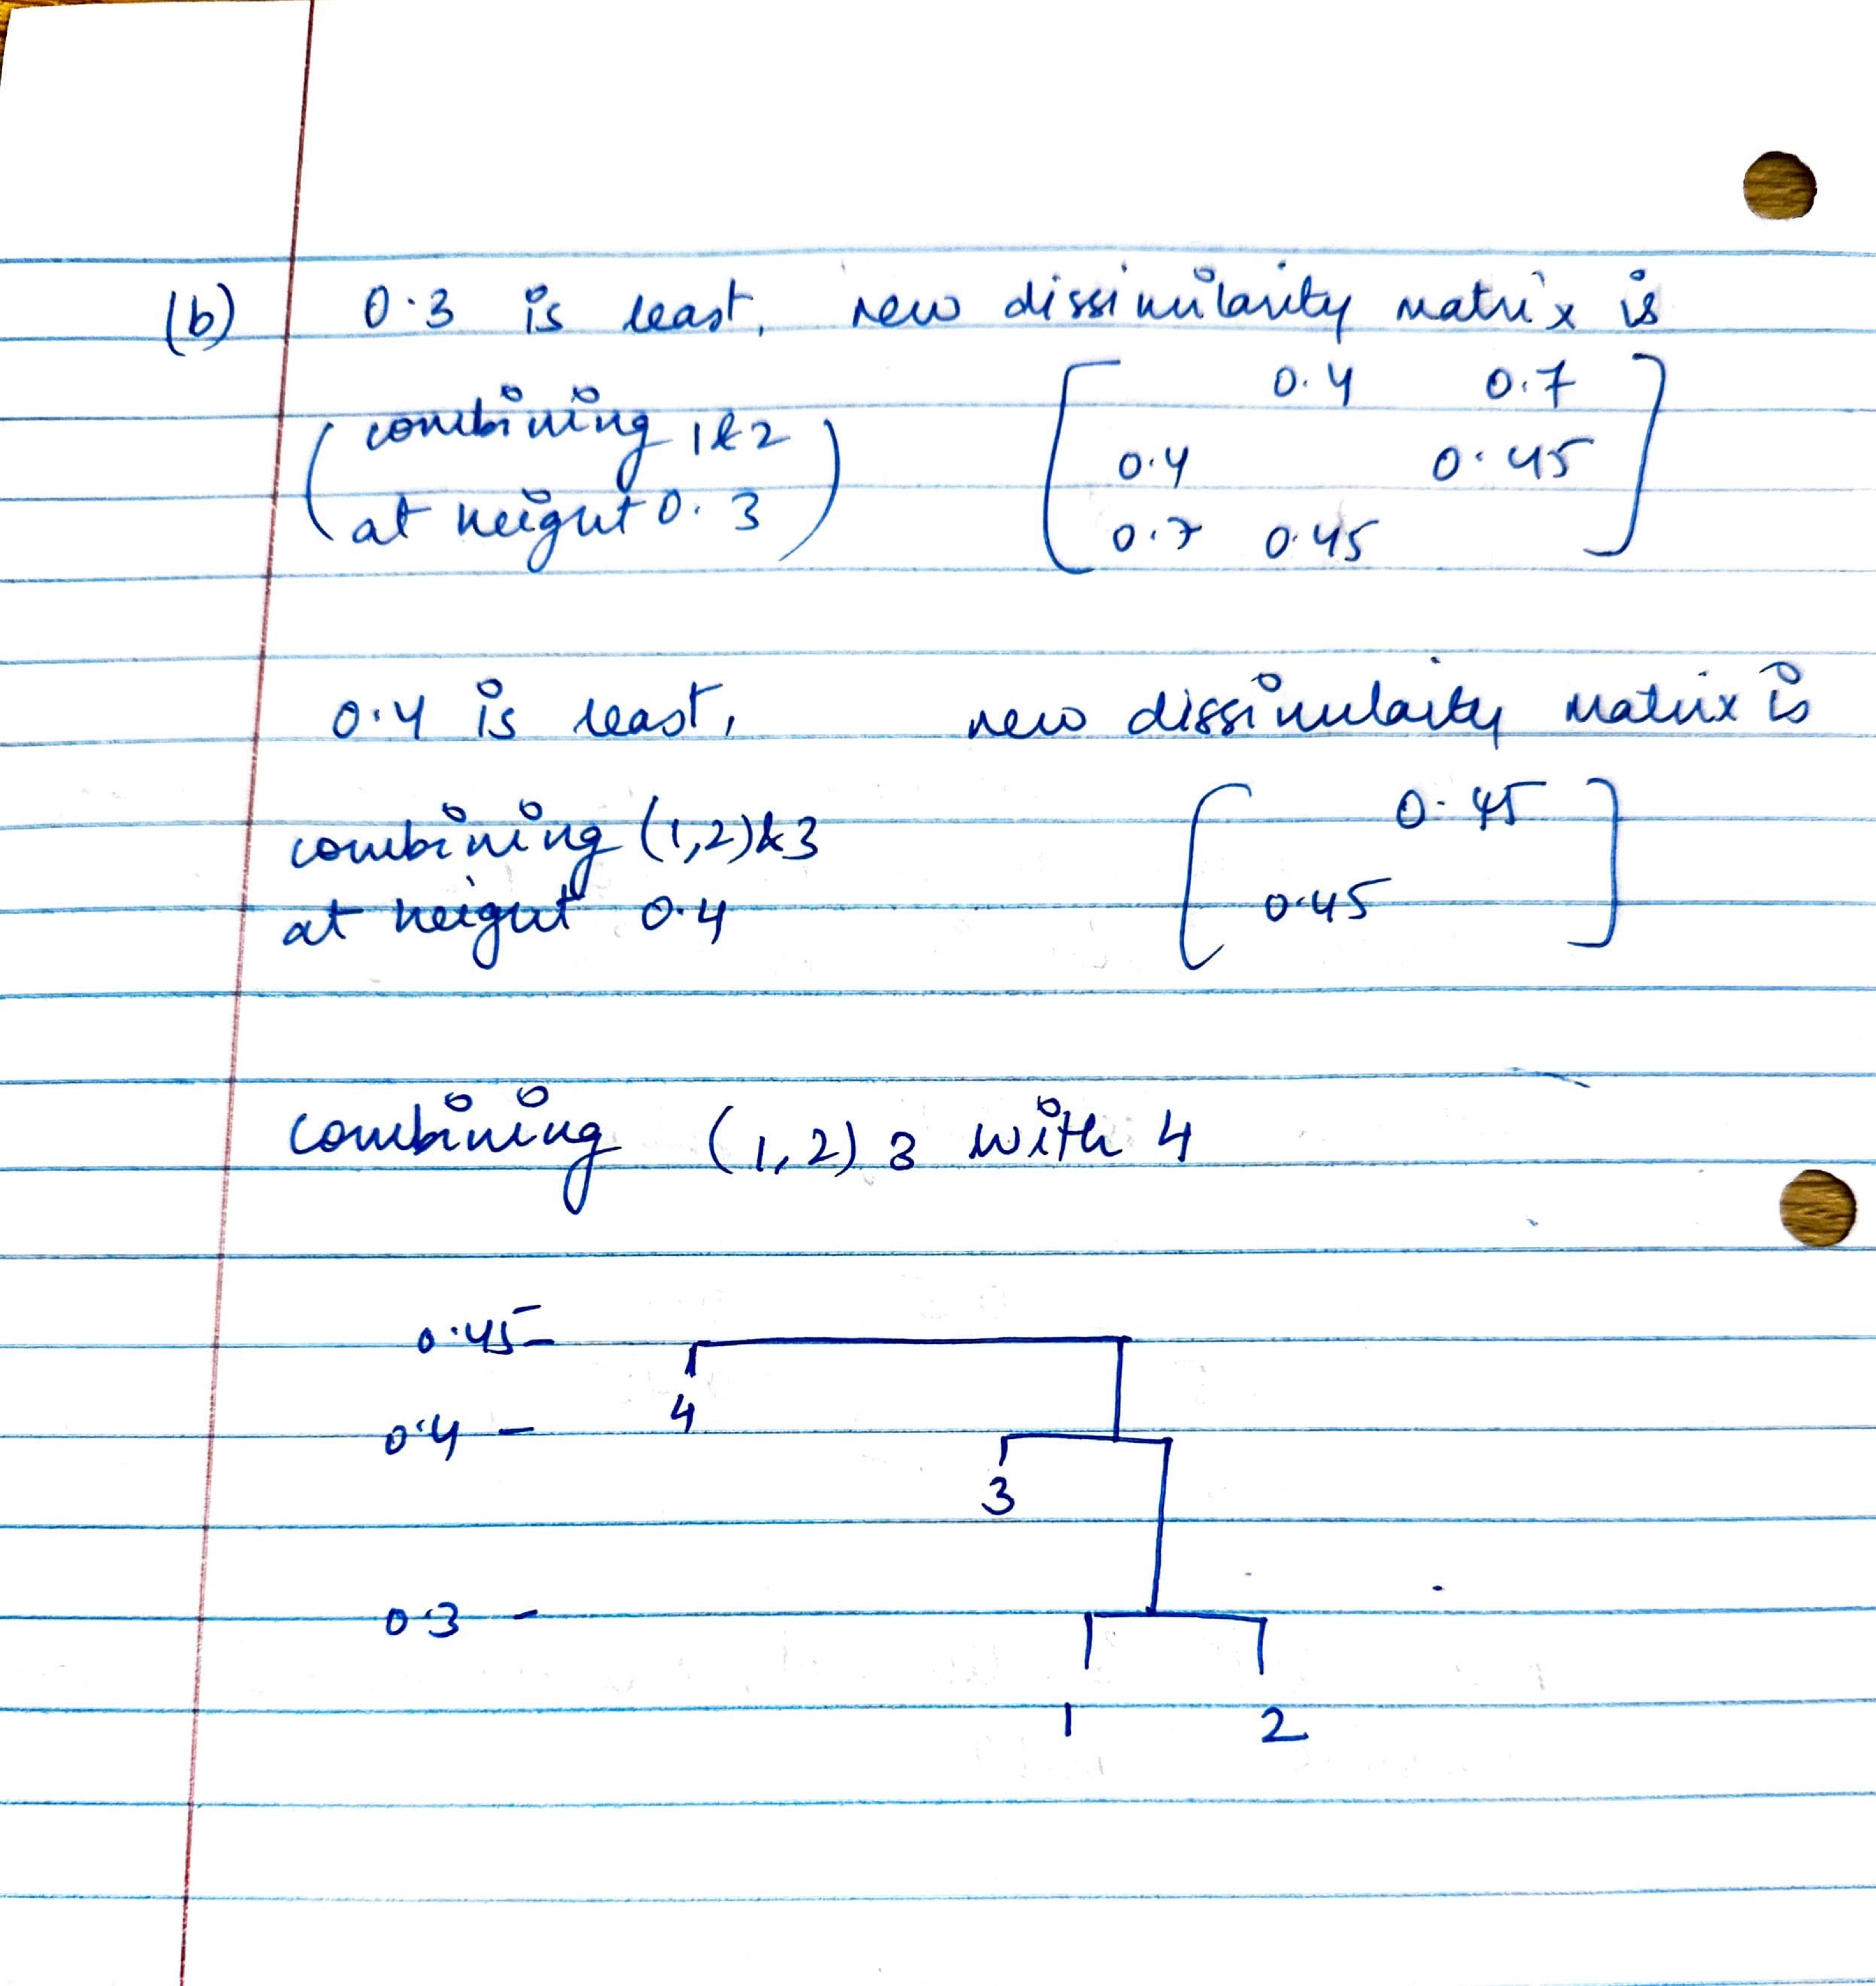

### __(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?__

- There are 2 clusters : { 1,  2 } and { 3, 4 }.

### __(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?__

- There are 2 clusters : { ( 1,  2 ), 3 } and { 4 }.

### __(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.__

- Denrogram equivalent to (a)

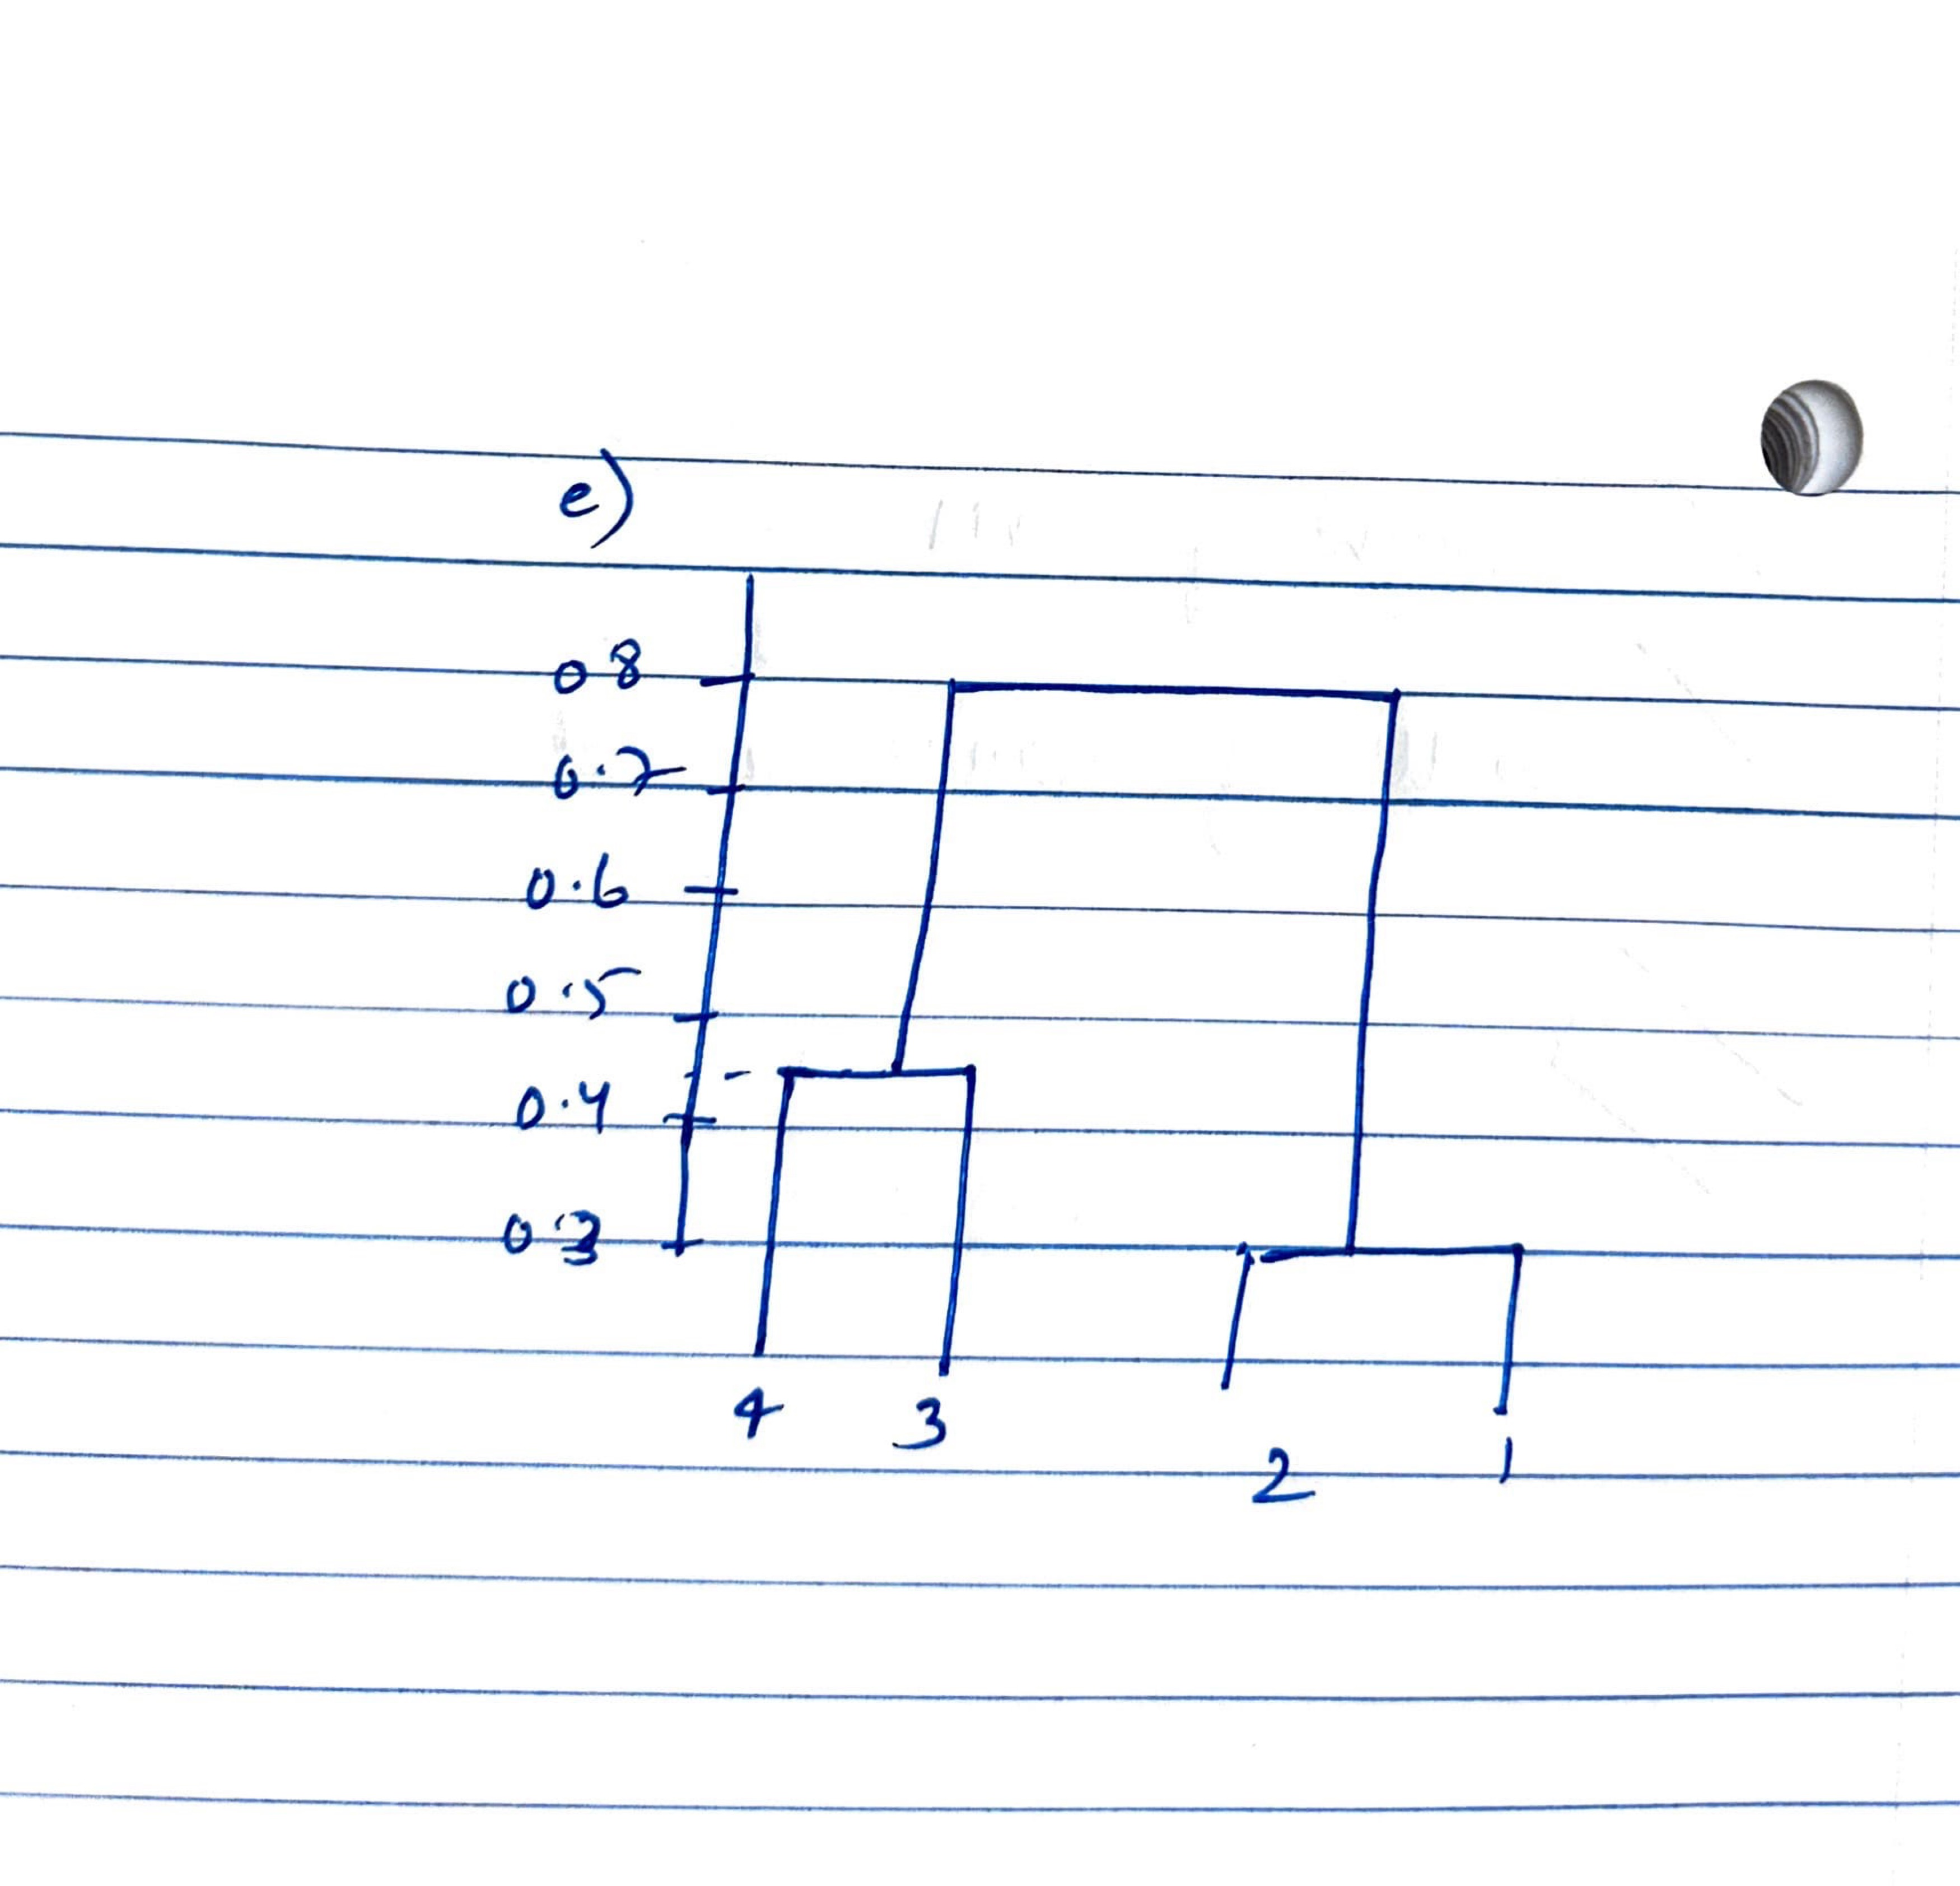

**Refrences and Citations:**
1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
4. https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
7. https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn/50245954
8. https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html
9. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
10. https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline
11. https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv
12. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
13. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
14. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
15. https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati